# Nashville Analytics Summit 2021

# Predicting how expensive providers are for the BHHS using Python

# Defining the purpose:

In [1]:
# Import key modules/packages

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import re

In [105]:
# Modeling Imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Acquisiton:

In [3]:
# Go to website to acquire data Center for Medicare and Medicaid Services
# 
df = pd.read_csv(r'C:\Users\JayRoy\Desktop\NAS 21\newdata2.csv', sep='|')



C:\Users\JayRoy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Exploration, Profiling and Cleansing:

In [12]:
##df.head(10)

In [7]:
df.shape

(1048575, 73)

In [9]:
df.head(10) 

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,"Bene_Avg_Risk_Scre,,,,,,,,"
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,900 Seton Dr,NaN,Cumberland,...,0.42,0.53,0.67,0.75,0.53,0.12,0.49,0.09,0.13,"2.0239,,,,,,,"
1,1003000134,Cibull,Thomas,L,M.D.,M,I,2650 Ridge Ave,Evanston Hospital,Evanston,...,0.14,0.21,0.46,0.54,0.26,0.09,0.38,0.01,0.03,"1.0925,,,,,,,"
2,1003000142,Khalil,Rashid,NaN,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,...,0.51,0.37,0.53,0.73,0.38,0.08,0.75,0.06,0.05,"1.5809,,,,,,,"
3,1003000407,Girardi,David,J,D.O.,M,I,100 Hospital Rd,NaN,Brookville,...,0.48,0.40,0.69,0.75,0.64,0.15,0.43,0.12,0.14,"2,,,,,,"
4,1003000423,Velotta,Jennifer,A,M.D.,F,I,11100 Euclid Ave,NaN,Cleveland,...,0.28,0.27,0.41,0.52,0.21,NaN,0.46,NaN,0.00,"0.954,,,,,,,"
5,1003000480,Rothchild,Kevin,B,MD,M,I,12605 E 16th Ave,NaN,Aurora,...,0.42,0.39,0.35,0.64,0.34,0.14,0.56,NaN,NaN,"1.6955,,,,,,,"
6,1003000522,Weigand,Frederick,J,MD,M,I,1565 Saxon Blvd,Suite 102,Deltona,...,0.16,0.32,0.75,0.75,0.39,0.11,0.54,NaN,0.06,"1.2619,,,,,,,"
7,1003000530,Semonche,Amanda,M,DO,F,I,1021 Park Ave,Suite 203,Quakertown,...,0.25,0.26,0.62,0.67,0.29,0.05,0.27,0.03,NaN,"1.0124,,,,,,,"
8,1003000597,Kim,Dae,Y,"M.D., PH.D",M,I,1145 S Utica Ave,Suite 202,Tulsa,...,0.31,0.37,0.57,0.75,0.44,0.06,0.47,0.04,0.08,"1.7237,,,,,,"
9,1003000639,Benharash,Peyman,NaN,MD,M,I,Ucla Cardiothoracic Surgery 10833 Leconte Ave,62-182 Chs,Los Angeles,...,0.31,0.51,0.75,0.75,0.75,NaN,0.37,NaN,NaN,"2.6818,,,,,,,"


In [69]:
## Let's do some initial data profiling and look at the specific names of the variables in our dataset
list(df)
## What types of data do we have in this dataset ?
## What would be helpful to understand the dataset ? A: Data Dictionary
## Many of our fields are appended with "Rndrng_" or example 'Rndrng_Prvdr_First_Name' - What is the meaning of "Rndrng_" ?
## Few fields are appended with "Tot_" .... - What is the meaning of "Tot_" ?
## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/#:~:text=The%20log%20transformation%20is%2C%20arguably,normal%20or%20near%20normal%20distribution.


['Rndrng_NPI',
 'Rndrng_Prvdr_Last_Org_Name',
 'Rndrng_Prvdr_First_Name',
 'Rndrng_Prvdr_MI',
 'Rndrng_Prvdr_Crdntls',
 'Rndrng_Prvdr_Gndr',
 'Rndrng_Prvdr_Ent_Cd',
 'Rndrng_Prvdr_St1',
 'Rndrng_Prvdr_St2',
 'Rndrng_Prvdr_City',
 'Rndrng_Prvdr_State_Abrvtn',
 'Rndrng_Prvdr_State_FIPS',
 'Rndrng_Prvdr_Zip5',
 'Rndrng_Prvdr_RUCA',
 'Rndrng_Prvdr_RUCA_Desc',
 'Rndrng_Prvdr_Cntry',
 'Rndrng_Prvdr_Type',
 'Rndrng_Prvdr_Mdcr_Prtcptg_Ind',
 'Tot_HCPCS_Cds',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Sbmtd_Chrg',
 'Tot_Mdcr_Alowd_Amt',
 'Tot_Mdcr_Pymt_Amt',
 'Tot_Mdcr_Stdzd_Amt',
 'Drug_Sprsn_Ind',
 'Drug_Tot_HCPCS_Cds',
 'Drug_Tot_Benes',
 'Drug_Tot_Srvcs',
 'Drug_Sbmtd_Chrg',
 'Drug_Mdcr_Alowd_Amt',
 'Drug_Mdcr_Pymt_Amt',
 'Drug_Mdcr_Stdzd_Amt',
 'Med_Sprsn_Ind',
 'Med_Tot_HCPCS_Cds',
 'Med_Tot_Benes',
 'Med_Tot_Srvcs',
 'Med_Sbmtd_Chrg',
 'Med_Mdcr_Alowd_Amt',
 'Med_Mdcr_Pymt_Amt',
 'Med_Mdcr_Stdzd_Amt',
 'Bene_Avg_Age',
 'Bene_Age_LT_65_Cnt',
 'Bene_Age_65_74_Cnt',
 'Bene_Age_75_84_Cnt',
 'Bene_Age

In [47]:
##df.iloc[1:2, 18:25]
## We will be interested in Tot_Srvcs,Tot_Mdcr_Pymt_Amt
## Interesting to see how much the difference between Submitted, Allowed and Paid amounts.

## Drug charges - Medicare Part D
df.iloc[0:1, 25:33]


,Drug_Sprsn_Ind,Drug_Tot_HCPCS_Cds,Drug_Tot_Benes,Drug_Tot_Srvcs,Drug_Sbmtd_Chrg,Drug_Mdcr_Alowd_Amt,Drug_Mdcr_Pymt_Amt,Drug_Mdcr_Stdzd_Amt
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## What's the quality of the data ? - Remember G.I.G.O. OR R.I.R.O. ? 
## Missing data 
## Remove incomplete rows - Use case - enrollment data does not have right SSN in the dataset)
## Change Casing
## lots of NaN

In [14]:
## Check to see if there are any providers in NOT paraticipating or empty values ?
## If so, remove NaN from Rndrng_Prvdr_Ent_Cd column
df[df.Rndrng_Prvdr_Mdcr_Prtcptg_Ind.isnull() == True]


,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,"Bene_Avg_Risk_Scre,,,,,,,,"
1028534,1972687440,Moes,Elisabeth,NaN,"PH.D., ABPP/ABC",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,,,"


In [15]:
##df.drop(index=1053958, inplace=True)
df.drop(index=1028534, inplace=True)

In [16]:
df[df.Rndrng_Prvdr_Mdcr_Prtcptg_Ind.isnull() == True]

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,"Bene_Avg_Risk_Scre,,,,,,,,"


In [19]:
## Now that we know that the providers are participating in Medicare, let's look at the types of providers in our dataset.
## The variable is Rndrng_Prvdr_Type

In [20]:
df.loc[:,"Rndrng_Prvdr_Type"]

0                                      Internal Medicine
1                                              Pathology
2                                         Anesthesiology
3                                        Family Practice
4                                Obstetrics & Gynecology
                               ...                      
1048570                                   Otolaryngology
1048571    Certified Registered Nurse Anesthetist (CRNA)
1048572                                    Endocrinology
1048573                                    Endocrinology
1048574                                Internal Medicine
Name: Rndrng_Prvdr_Type, Length: 1048574, dtype: object

In [23]:
print(pd.unique(df['Rndrng_Prvdr_Type']))

['Internal Medicine' 'Pathology' 'Anesthesiology' 'Family Practice'
 'Obstetrics & Gynecology' 'General Surgery' 'Urology' 'Cardiac Surgery'
 'Physician Assistant' 'Physical Therapist in Private Practice'
 'Dermatology' 'Certified Registered Nurse Anesthetist (CRNA)'
 'Mass Immunizer Roster Biller' 'Physical Medicine and Rehabilitation'
 'Radiation Oncology' 'Infectious Disease' 'Orthopedic Surgery'
 'Licensed Clinical Social Worker' 'Certified Clinical Nurse Specialist'
 'Endocrinology' 'Chiropractic' 'Diagnostic Radiology' 'Centralized Flu'
 'Rheumatology' 'General Practice' 'Neurology' 'Emergency Medicine'
 'Nephrology' 'Hand Surgery' 'Ophthalmology' 'Nurse Practitioner'
 'Pulmonary Disease' 'Otolaryngology' 'Plastic and Reconstructive Surgery'
 'Psychologist, Clinical' 'Cardiovascular Disease (Cardiology)'
 'Ambulance Service Provider' 'Osteopathic Manipulative Medicine'
 'Psychiatry' 'Interventional Cardiology' 'Audiologist'
 'Geriatric Medicine' 'Neurosurgery' 'Gastroenterology' 

In [21]:
n = len(pd.unique(df['Rndrng_Prvdr_Type']))

In [22]:
print("No.of.unique specialty types :", n)

No.of.unique specialty types : 91


In [30]:
df['Rndrng_Prvdr_Type'].nunique()

91

In [24]:
num_of_endo_docs =df["Rndrng_Prvdr_Type"].str.count("Endocrinology", re.I)

In [25]:
num_of_endo_docs.value_counts()

0    1043047
1       5527
Name: Rndrng_Prvdr_Type, dtype: int64

In [26]:
num_of_im_docs =df["Rndrng_Prvdr_Type"].str.count("Internal Medicine", re.I)

In [27]:
num_of_im_docs.value_counts()

0    948278
1    100296
Name: Rndrng_Prvdr_Type, dtype: int64

In [29]:
df['Rndrng_Prvdr_Type'].value_counts()

Internal Medicine                         100296
Nurse Practitioner                         98002
Family Practice                            83702
Physician Assistant                        65613
Physical Therapist in Private Practice     46965
                                           ...  
Slide Preparation Facility                    23
Mammography Center                            18
Unknown Supplier/Provider Specialty           12
Hospitalist                                    2
Dentist                                        2
Name: Rndrng_Prvdr_Type, Length: 91, dtype: int64

In [21]:
## Create a distribution of providers
df_pt = pd.DataFrame(columns = df['Rndrng_Prvdr_Type'])

In [25]:
##print(df_pt)

In [81]:
df_pt.head(5)

Rndrng_Prvdr_Type,Internal Medicine,Pathology,Anesthesiology,Family Practice,Obstetrics & Gynecology,General Surgery,Family Practice,Internal Medicine,Urology,Cardiac Surgery,...,Emergency Medicine,Cardiac Surgery,Radiation Oncology,Anesthesiology,Diagnostic Radiology,Otolaryngology,Certified Registered Nurse Anesthetist (CRNA),Endocrinology,Endocrinology,Internal Medicine


In [80]:
df.loc[:,['Rndrng_Prvdr_Type','Tot_Srvcs','Tot_Mdcr_Pymt_Amt']]

,Rndrng_Prvdr_Type,Tot_Srvcs,Tot_Mdcr_Pymt_Amt
0,Internal Medicine,1477.0,124795.99
1,Pathology,8704.0,256165.66
2,Anesthesiology,1608.0,66353.23
3,Family Practice,1637.0,136143.38
4,Obstetrics & Gynecology,163.0,10519.26
...,...,...,...
1048570,Otolaryngology,5808.0,290321.66
1048571,Certified Registered Nurse Anesthetist (CRNA),37.0,5110.92
1048572,Endocrinology,201.0,17823.57
1048573,Endocrinology,3367.0,75020.04


In [ ]:
Creating heatmap to look for multicolinearity and correlations 
# between target(TOTAL_MEDICARE_PAYMENT_AMT) and all predictor variables

In [49]:
# dropping medical organizations(don't have a gender) and only selecting individuals
df[df.Rndrng_Prvdr_Gndr.isnull() == True].index

Int64Index([     21,      36,      66,      69,      84,      98,     109,
                153,     282,     284,
            ...
            1048135, 1048161, 1048188, 1048223, 1048373, 1048375, 1048406,
            1048459, 1048461, 1048506],
           dtype='int64', length=62298)

In [50]:
# dropping medical organizations(don't have a gender) and only selecting individual providers
indiv  = df.drop(index=(df[df.Rndrng_Prvdr_Gndr.isnull() == True].index))

In [55]:
indiv.shape
#indiv.Rndrng_Prvdr_Cntry != 'US'
#indiv.Rndrng_Prvdr_Cntry == 'US'# 986276

(986276, 73)

In [56]:
indiv.Rndrng_Prvdr_Gndr

0          M
1          M
2          M
3          M
4          F
          ..
1048570    M
1048571    F
1048572    M
1048573    F
1048574    M
Name: Rndrng_Prvdr_Gndr, Length: 986276, dtype: object

In [58]:
indiv.Rndrng_Prvdr_Mdcr_Prtcptg_Ind

0          Y
1          Y
2          Y
3          Y
4          Y
          ..
1048569    Y
1048570    Y
1048571    Y
1048572    Y
1048574    Y
Name: Rndrng_Prvdr_Mdcr_Prtcptg_Ind, Length: 985360, dtype: object

In [59]:
# Removing doctors who dont participate in Medicare
indiv = indiv[indiv.Rndrng_Prvdr_Mdcr_Prtcptg_Ind != 'N']


In [63]:
indiv.Rndrng_Prvdr_Mdcr_Prtcptg_Ind.value_counts()

Y    985360
Name: Rndrng_Prvdr_Mdcr_Prtcptg_Ind, dtype: int64

In [64]:
nan_fill_list = ['Bene_Age_LESS_65_COUNT',
       'Bene_Age_65_74_COUNT', 'Bene_Age_75_84_COUNT',
       'Bene_Age_GREATER_84_COUNT', 
        'Bene_Feml_Cnt',
'Bene_Male_Cnt',
'Bene_Race_Wht_Cnt',
'Bene_Race_Black_Cnt',
'Bene_Race_API_Cnt',
'Bene_Race_Hspnc_Cnt',
'Bene_Race_NatInd_Cnt',
'Bene_Race_Othr_Cnt',
'Bene_Dual_Cnt',
'Bene_Ndual_Cnt',
'Bene_CC_AF_Pct',
'Bene_CC_Alzhmr_Pct',
'Bene_CC_Asthma_Pct',
'Bene_CC_Cncr_Pct',
'Bene_CC_CHF_Pct',
'Bene_CC_CKD_Pct',
'Bene_CC_COPD_Pct',
'Bene_CC_Dprssn_Pct',
'Bene_CC_Dbts_Pct',
'Bene_CC_Hyplpdma_Pct',
'Bene_CC_Hyprtnsn_Pct',
'Bene_CC_IHD_Pct',
'Bene_CC_Opo_Pct',
'Bene_CC_RAOA_Pct',
'Bene_CC_Sz_Pct',
'Bene_CC_Strok_Pct',
'Bene_Avg_Risk_Scre,,,,,,,,'
        ]

In [65]:
print(nan_fill_list)

['Bene_Age_LESS_65_COUNT', 'Bene_Age_65_74_COUNT', 'Bene_Age_75_84_COUNT', 'Bene_Age_GREATER_84_COUNT', 'Bene_Feml_Cnt', 'Bene_Male_Cnt', 'Bene_Race_Wht_Cnt', 'Bene_Race_Black_Cnt', 'Bene_Race_API_Cnt', 'Bene_Race_Hspnc_Cnt', 'Bene_Race_NatInd_Cnt', 'Bene_Race_Othr_Cnt', 'Bene_Dual_Cnt', 'Bene_Ndual_Cnt', 'Bene_CC_AF_Pct', 'Bene_CC_Alzhmr_Pct', 'Bene_CC_Asthma_Pct', 'Bene_CC_Cncr_Pct', 'Bene_CC_CHF_Pct', 'Bene_CC_CKD_Pct', 'Bene_CC_COPD_Pct', 'Bene_CC_Dprssn_Pct', 'Bene_CC_Dbts_Pct', 'Bene_CC_Hyplpdma_Pct', 'Bene_CC_Hyprtnsn_Pct', 'Bene_CC_IHD_Pct', 'Bene_CC_Opo_Pct', 'Bene_CC_RAOA_Pct', 'Bene_CC_Sz_Pct', 'Bene_CC_Strok_Pct', 'Bene_Avg_Risk_Scre,,,,,,,,']


In [66]:
# replacing nulls in numerical columns with zeroes
indiv.loc[:,nan_fill_list] = indiv.loc[:,nan_fill_list].fillna(0)

C:\Users\JayRoy\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


KeyError: "['Bene_Age_65_74_COUNT', 'Bene_Age_LESS_65_COUNT', 'Bene_Age_75_84_COUNT', 'Bene_Age_GREATER_84_COUNT'] not in index"

In [70]:
indiv.shape

(985360, 73)

In [71]:
# removing unnecessary columns for next stage of analysis
clean_indiv = indiv.drop(columns=[
'Rndrng_NPI',
'Rndrng_Prvdr_Last_Org_Name',
'Rndrng_Prvdr_First_Name',
'Rndrng_Prvdr_MI',
'Rndrng_Prvdr_Crdntls',
'Rndrng_Prvdr_Ent_Cd',
'Rndrng_Prvdr_St1',
'Rndrng_Prvdr_St2',
'Rndrng_Prvdr_City',
##'Rndrng_Prvdr_State_Abrvtn',
'Rndrng_Prvdr_State_FIPS',
'Rndrng_Prvdr_Zip5',
'Rndrng_Prvdr_RUCA',
'Rndrng_Prvdr_RUCA_Desc',
'Rndrng_Prvdr_Cntry',
'Rndrng_Prvdr_Mdcr_Prtcptg_Ind'                                  
])

In [72]:
clean_indiv.shape

(985360, 58)

In [77]:
# Remove rows with Medicare values of 0 and keep only those actual payments from CMS
clean_indiv = clean_indiv[clean_indiv.Tot_Mdcr_Pymt_Amt != 0]

In [87]:
clean_indiv.shape

(985350, 58)

In [89]:
clean_indiv.head()

,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_Type,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,Tot_Mdcr_Stdzd_Amt,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,"Bene_Avg_Risk_Scre,,,,,,,,"
0,M,MD,Internal Medicine,23.0,518.0,1477.0,746533.0,157362.25,124795.99,126129.38,...,0.42,0.53,0.67,0.75,0.53,0.12,0.49,0.09,0.13,"2.0239,,,,,,,"
1,M,IL,Pathology,18.0,4003.0,8704.0,1372997.0,336799.03,256165.66,247675.89,...,0.14,0.21,0.46,0.54,0.26,0.09,0.38,0.01,0.03,"1.0925,,,,,,,"
2,M,OH,Anesthesiology,43.0,208.0,1608.0,158846.0,89764.66,66353.23,69022.76,...,0.51,0.37,0.53,0.73,0.38,0.08,0.75,0.06,0.05,"1.5809,,,,,,,"
3,M,PA,Family Practice,31.0,401.0,1637.0,260033.0,173520.70,136143.38,141936.65,...,0.48,0.40,0.69,0.75,0.64,0.15,0.43,0.12,0.14,"2,,,,,,"
4,F,OH,Obstetrics & Gynecology,26.0,82.0,163.0,25862.0,12894.39,10519.26,11261.45,...,0.28,0.27,0.41,0.52,0.21,NaN,0.46,NaN,0.00,"0.954,,,,,,,"


In [93]:
# Dropping unnecessary or price-based columns
clean_df = clean_indiv.drop(columns = [
'Bene_Avg_Risk_Scre,,,,,,,,',
'Tot_Sbmtd_Chrg',
'Med_Tot_HCPCS_Cds',
'Med_Tot_Srvcs',
'Drug_Tot_HCPCS_Cds',
'Drug_Tot_Srvcs',
'Drug_Sprsn_Ind',
'Med_Sprsn_Ind',
'Tot_Mdcr_Alowd_Amt',
'Tot_Mdcr_Stdzd_Amt',
'Drug_Tot_Benes',
'Drug_Sbmtd_Chrg',
'Drug_Mdcr_Alowd_Amt',
'Drug_Mdcr_Pymt_Amt',
'Drug_Mdcr_Stdzd_Amt',
'Med_Tot_Benes',
'Med_Sbmtd_Chrg',
'Med_Mdcr_Alowd_Amt',
'Med_Mdcr_Pymt_Amt',
'Med_Mdcr_Stdzd_Amt',
])

In [94]:
# Shape before removing columns
print(clean_indiv.shape)

# Shape after removing columns
print(clean_df.shape)

(985350, 58)
(985350, 38)


# Model Building without Feature Engineering

In [ ]:
y=a+ bx

x=clean_df.TOTAL_SERVICES, y=clean_df.TOTAL_MEDICARE_PAYMENT_AMT




# Model Building without Feature Engineering

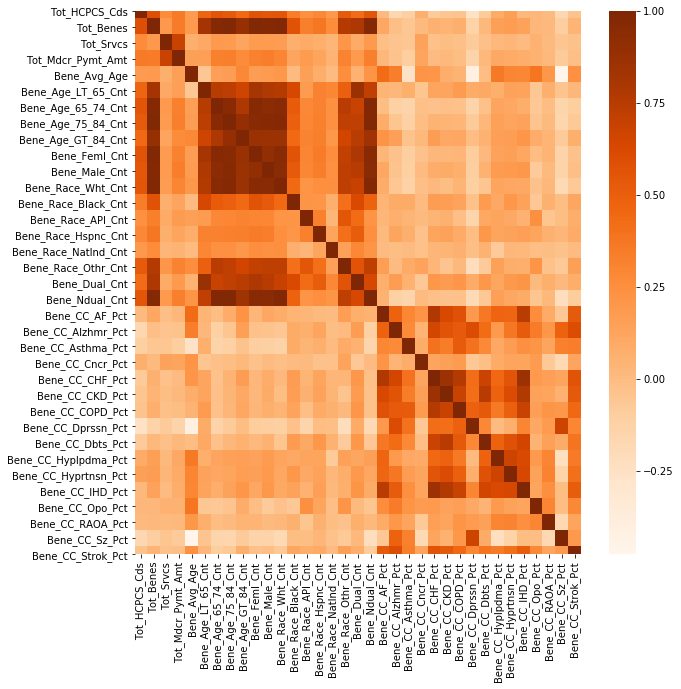

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(clean_df.corr(), cmap='Oranges');

In [96]:

clean_df.corr()

,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Mdcr_Pymt_Amt,Bene_Avg_Age,Bene_Age_LT_65_Cnt,Bene_Age_65_74_Cnt,Bene_Age_75_84_Cnt,Bene_Age_GT_84_Cnt,Bene_Feml_Cnt,...,Bene_CC_COPD_Pct,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct
Tot_HCPCS_Cds,1.000000,0.592683,0.266918,0.355091,0.176286,0.464035,0.560432,0.531340,0.445667,0.572325,...,-0.039011,-0.254055,-0.073762,0.088524,0.152143,0.024359,0.025621,0.012794,-0.167620,-0.033418
Tot_Benes,0.592683,1.000000,0.193028,0.349296,0.187644,0.822395,0.975174,0.984112,0.889329,0.984390,...,0.065256,-0.127779,0.020756,0.154751,0.170647,0.143269,0.024995,0.013836,-0.102082,0.044596
Tot_Srvcs,0.266918,0.193028,1.000000,0.693753,0.067101,0.101690,0.191383,0.184745,0.127936,0.181280,...,-0.017163,-0.076986,-0.017391,0.023690,0.032273,0.006053,0.056422,0.007743,-0.049722,-0.029202
Tot_Mdcr_Pymt_Amt,0.355091,0.349296,0.693753,1.000000,0.154976,0.158202,0.325597,0.334817,0.272419,0.317909,...,-0.010180,-0.132144,0.022174,0.101014,0.098090,0.079258,0.056920,0.021848,-0.075420,-0.010543
Bene_Avg_Age,0.176286,0.187644,0.067101,0.154976,1.000000,-0.060431,0.157294,0.170468,0.284931,0.173192,...,0.047933,-0.416499,0.000223,0.359948,0.304486,0.296507,0.383209,0.201729,-0.477778,0.242269
Bene_Age_LT_65_Cnt,0.464035,0.822395,0.101690,0.158202,-0.060431,1.000000,0.756909,0.734418,0.668731,0.816319,...,0.184732,0.090086,0.107635,0.075245,0.141712,0.136908,-0.062014,0.068113,-0.040796,0.025775
Bene_Age_65_74_Cnt,0.560432,0.975174,0.191383,0.325597,0.157294,0.756909,1.000000,0.958793,0.789055,0.964658,...,-0.025720,-0.138481,-0.027326,0.125928,0.115007,0.076590,-0.064370,-0.000793,-0.143983,-0.093468
Bene_Age_75_84_Cnt,0.531340,0.984112,0.184745,0.334817,0.170468,0.734418,0.958793,1.000000,0.895831,0.959554,...,0.035851,-0.076107,0.027983,0.146281,0.130496,0.145089,-0.039312,0.012791,-0.157576,-0.067957
Bene_Age_GT_84_Cnt,0.445667,0.889329,0.127936,0.272419,0.284931,0.668731,0.789055,0.895831,1.000000,0.867846,...,0.115341,-0.002361,0.056239,0.159437,0.163722,0.211531,0.082377,0.045855,-0.073808,0.071011
Bene_Feml_Cnt,0.572325,0.984390,0.181280,0.317909,0.173192,0.816319,0.964658,0.959554,0.867846,1.000000,...,0.031629,-0.089625,0.015625,0.143893,0.155842,0.112941,-0.002348,0.044994,-0.138853,-0.031741


In [113]:
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [114]:
formula = ols_formula(clean_df, 'TOTAL_MEDICARE_PAYMENT_AMT')
y, X = patsy.dmatrices(formula, data=clean_df, return_type="dataframe")
model_no_fe = sm.OLS(y, X)
fit_no_fe = model_no_fe.fit()
fit_no_fe.summary()

ValueError: list.remove(x): x not in list

In [108]:
df_columns = list(df.columns.values)

In [110]:
list(df.columns.values)
df_columns.remove(dependent_var)

NameError: name 'dependent_var' is not defined

In [13]:
import statsmodels.api as sm

In [31]:
spector_data = sm.datasets.spector.load()

In [26]:
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

In [43]:
print (spector_data.endog)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1.]


In [1]:
##print(spector_data.exog)

In [45]:
mod = sm.OLS(spector_data.endog, spector_data.exog)

In [48]:
results = mod.fit()

In [50]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              9.852
Date:                Fri, 17 Sep 2021   Prob (F-statistic):                    0.000121
Time:                        13:55:32   Log-Likelihood:                         -17.077
No. Observations:                  32   AIC:                                      40.15
Df Residuals:                      29   BIC:                                      44.55
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
results.params

array([ 0.16290895, -0.01358674,  0.3649748 ])